In [35]:
# Project 3: Customer Segmentation Using K-Means
# Problem Statement: Businesses need to target different customers differently based on behavior.

In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("E:/AICTE Intern Tasks/RISE/Datasets/3_Customers.csv")

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [45]:
df.shape

(200, 5)

In [46]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
# There is no feature named 'Frequency', so add the feature. we can simulate this because it's not in the original data.

np.random.seed(42)
df['Frequency'] = np.random.randint(1, 20, size=len(df))

In [48]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Frequency                 0
dtype: int64


In [49]:
# Drop CustomerID as it's not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

In [50]:
# U can convert gender to numerical (0 for Female, 1 for Male)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Frequency               200 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [52]:
# Feature Selection and Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select features for clustering 
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Frequency']
X = df[features]

In [53]:
print(f"\nFeatures selected for clustering: {features}")
print("Selected features head:")
X.head()


Features selected for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Frequency']
Selected features head:


,Age,Annual Income (k$),Spending Score (1-100),Frequency
0,19,15,39,7
1,21,15,81,15
2,20,16,6,11
3,23,16,77,8
4,31,17,40,7


In [54]:
# Scale the features
scaler = StandardScaler()

In [55]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nScaled features head:")
print(X_scaled_df.head())


Scaled features head:
        Age  Annual Income (k$)  Spending Score (1-100)  Frequency
0 -1.424569           -1.738999               -0.434801  -0.413222
1 -1.281035           -1.738999                1.195704   1.046282
2 -1.352802           -1.700830               -1.715913   0.316530
3 -1.137502           -1.700830                1.040418  -0.230784
4 -0.563369           -1.662660               -0.395980  -0.413222


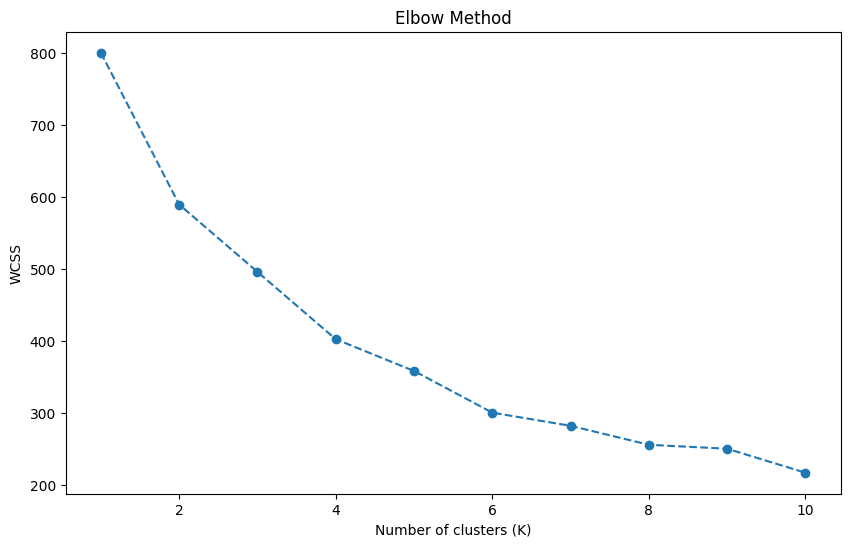

In [56]:
# Determine Optimal Number of Clusters

# we can use Gap Statistic also but for large datasets. 
# Using Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [57]:
# Using Silhouette Score
for n_clusters in range(2, 6):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"For n_clusters = {n_clusters}, silhouette score is {score:.3f}")

For n_clusters = 2, silhouette score is 0.249
For n_clusters = 3, silhouette score is 0.246
For n_clusters = 4, silhouette score is 0.270
For n_clusters = 5, silhouette score is 0.258


Silhouette Score for K=2: 0.249
Silhouette Score for K=3: 0.246
Silhouette Score for K=4: 0.270
Silhouette Score for K=5: 0.258
Silhouette Score for K=6: 0.279
Silhouette Score for K=7: 0.270
Silhouette Score for K=8: 0.277


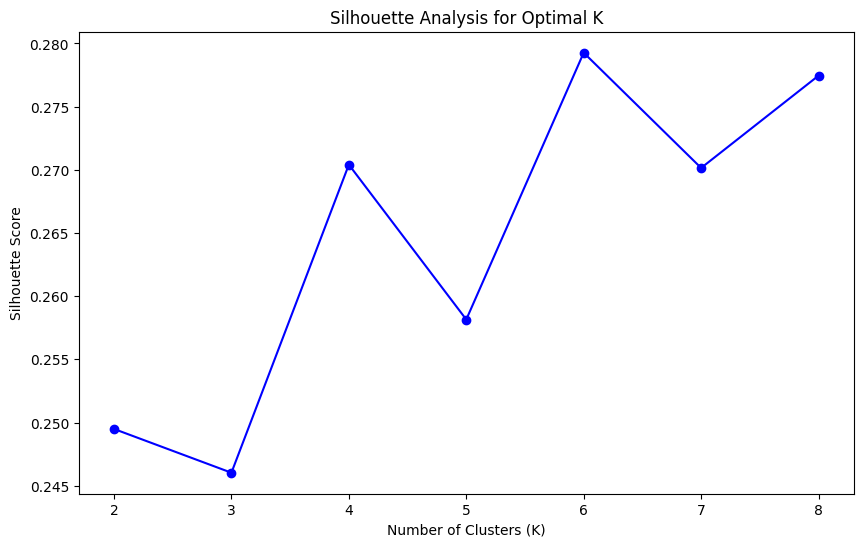

In [58]:
from sklearn.metrics import silhouette_score

# Try different K values (2-8)
silhouette_scores = []
for K in range(2, 9):
    kmeans = KMeans(n_clusters=K, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={K}: {score:.3f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

Silhouette Score for K=2: 0.249
Silhouette Score for K=3: 0.246
Silhouette Score for K=4: 0.270
Silhouette Score for K=5: 0.258
Silhouette Score for K=6: 0.279
Silhouette Score for K=7: 0.270
Silhouette Score for K=8: 0.277


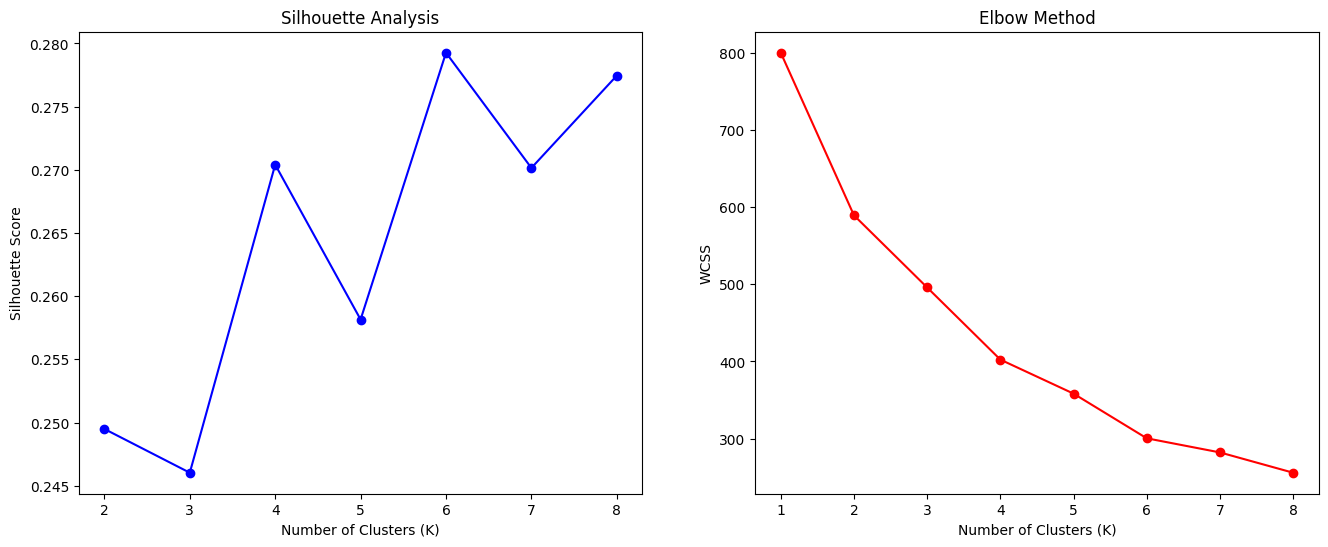

In [59]:
# Silhouette Analysis
silhouette_scores = []
for K in range(2, 9):
    kmeans = KMeans(n_clusters=K, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={K}: {score:.3f}")

# Elbow Method (WCSS)
wcss = []
for K in range(1, 9):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Both
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(range(2, 9), silhouette_scores, marker='o', color='b')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Analysis')

ax2.plot(range(1, 9), wcss, marker='o', color='r')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('WCSS')
ax2.set_title('Elbow Method')
plt.show()


In [60]:
# Now we can apply K-Means Clustering

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

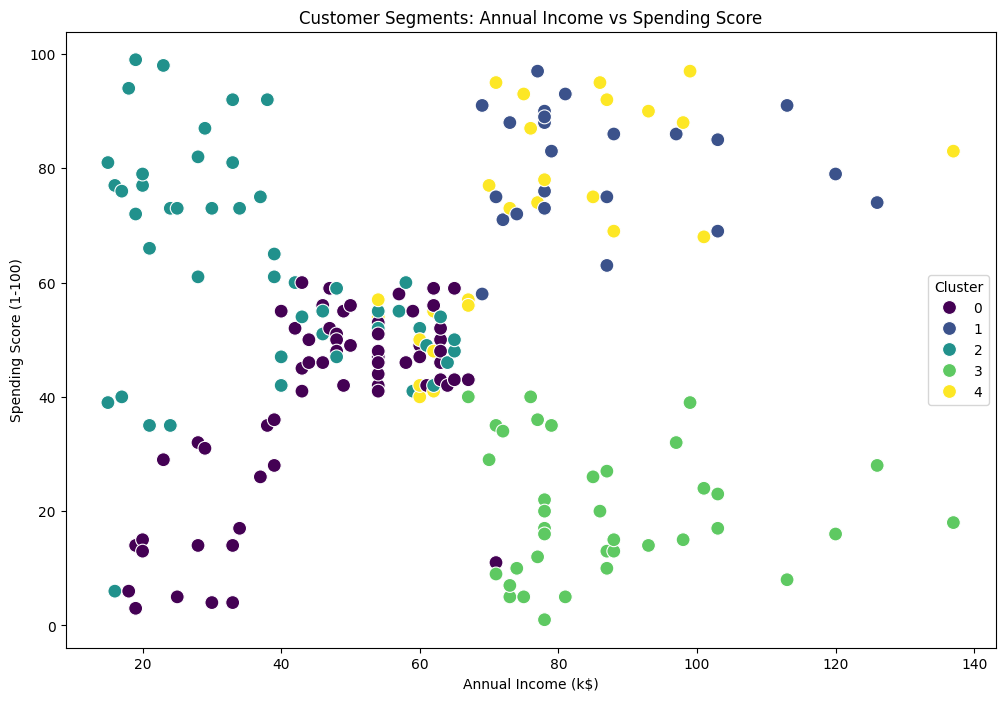

In [61]:
# Perform Visualization - Visualize the Clusters

# 2D Visualization: Annual Income vs Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments: Annual Income vs Spending Score')
plt.show()

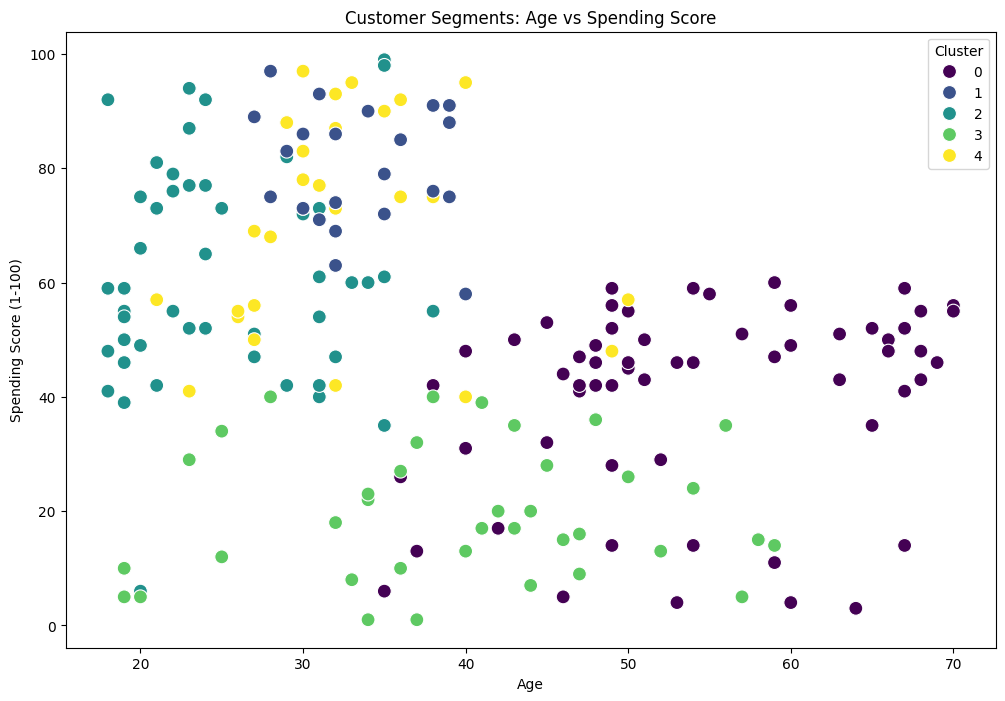

In [62]:

# 2D Visualization: Age vs Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments: Age vs Spending Score')
plt.show()


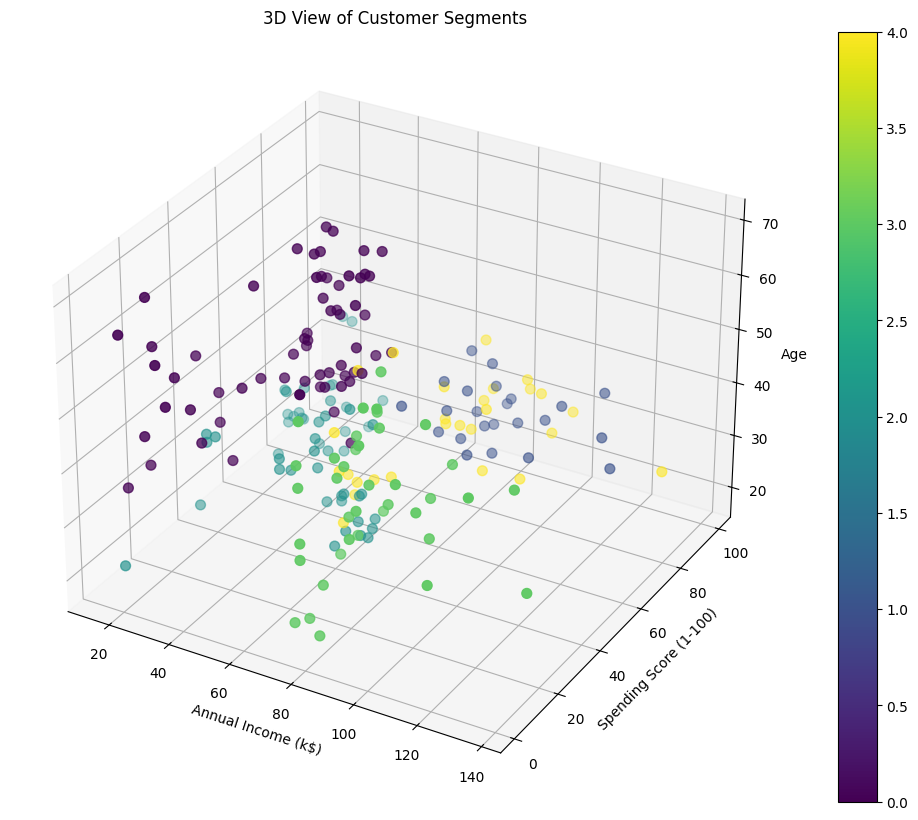

In [63]:

# 3D Visualization
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], c=df['Cluster'], s=50, cmap='viridis')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.title('3D View of Customer Segments')
plt.colorbar(scatter)
plt.show()

In [64]:
# Analyze and Interpret Clusters

# Cluster analysis
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Frequency': 'mean',
    'Gender': lambda x: x.mode()[0]}).round(2)

print(cluster_analysis)

# Rename clusters based on characteristics
cluster_names = {
    0: "High-Income, Low-Spending Professionals",
    1: "Young, High-Spending Shoppers",
    2: "Moderate-Income, Moderate-Spending Adults",
    3: "Low-Income, Low-Spending Customers",
    4: "Middle-Aged, High-Spending Enthusiasts"
}

df['Segment'] = df['Cluster'].map(cluster_names)

           Age  Annual Income (k$)  Spending Score (1-100)  Frequency  Gender
Cluster                                                                      
0        54.06               46.73                   39.68       9.97       0
1        33.22               86.04                   80.52      14.26       0
2        25.36               37.22                   61.64      10.48       0
3        39.84               86.89                   19.39       7.95       0
4        32.30               76.78                   70.70       3.00       0


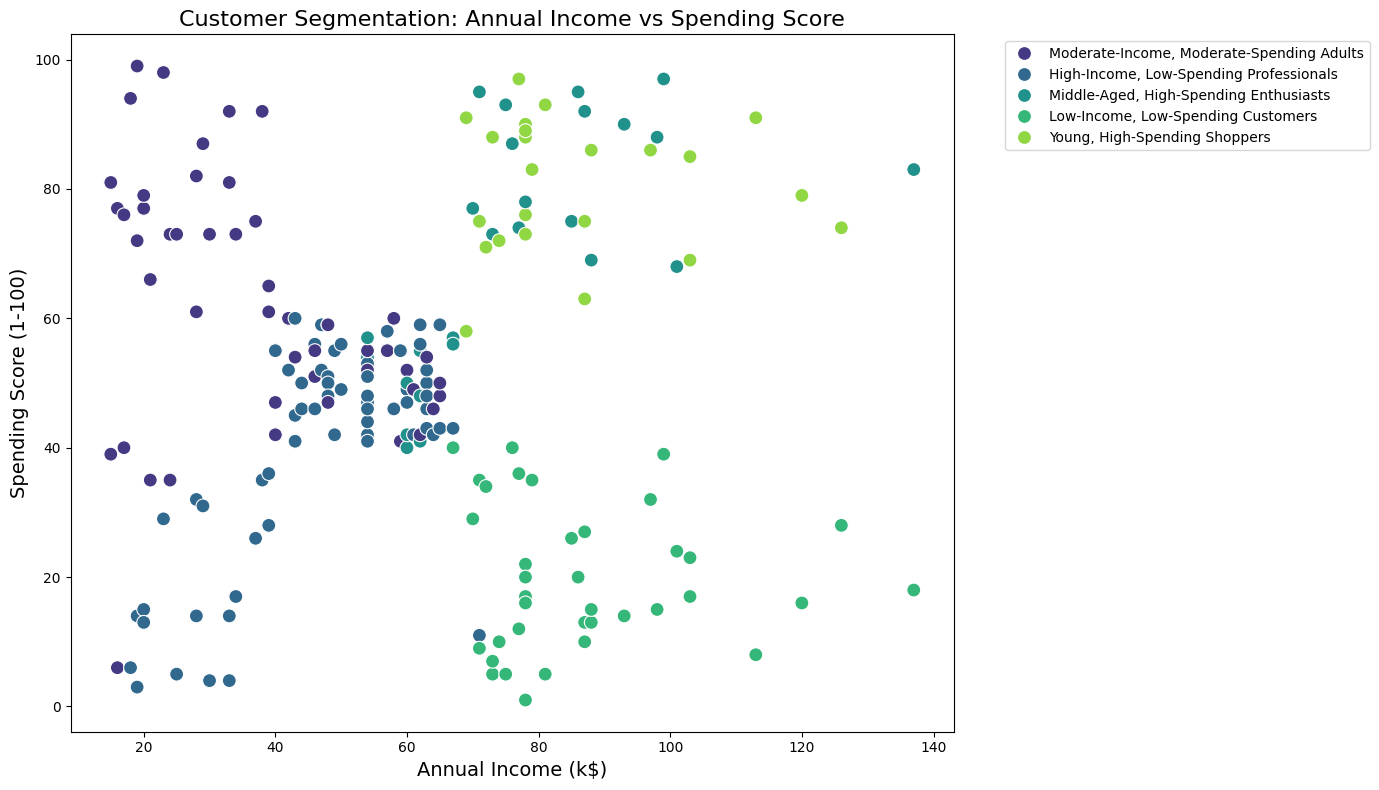

In [65]:
# Final Visualization with Segment Names

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', palette='viridis', s=100)
plt.title('Customer Segmentation: Annual Income vs Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
# Marketing Strategy Recommendations

# Print segment characteristics and marketing recommendations
for cluster_num, segment_name in cluster_names.items():
    segment_data = df[df['Cluster'] == cluster_num]
    print(f"\nSegment: {segment_name}")
    print(f"Size: {len(segment_data)} customers({len(segment_data)/len(df)*100:.1f}%)")
    print("Average Characteristics:")
    print(f"- Age: {segment_data['Age'].mean():.1f} years")
    print(f"- Annual Income: ${segment_data['Annual Income (k$)'].mean():.1f}k")
    print(f"- Spending Score: {segment_data['Spending Score (1-100)'].mean():.1f}/100")
    print(f"- Visit Frequency: {segment_data['Frequency'].mean():.1f} times")
    
    gender_dist = segment_data['Gender'].value_counts(normalize=True)
    if 0 in gender_dist.index:
        print(f"- {gender_dist[0]*100:.1f}% Female")
    if 1 in gender_dist.index:
        print(f"- {gender_dist[1]*100:.1f}% Male")
    
    print("\nRecommended Marketing Approach:")
    if cluster_num == 0:
        print("Target with premium/luxury products and loyalty programs")
    elif cluster_num == 1:
        print("Engage with trendy, fashionable items and social media campaigns")
    elif cluster_num == 2:
        print("Offer balanced value propositions and family-oriented deals")
    elif cluster_num == 3:
        print("Focus on budget-friendly options and essential products")
    elif cluster_num == 4:
        print("Promote experiential purchases and personalized services")
    
    print("\n" + "-"*80)


Segment: High-Income, Low-Spending Professionals
Size: 62 customers(31.0%)
Average Characteristics:
- Age: 54.1 years
- Annual Income: $46.7k
- Spending Score: 39.7/100
- Visit Frequency: 10.0 times
- 54.8% Female
- 45.2% Male

Recommended Marketing Approach:
Target with premium/luxury products and loyalty programs

--------------------------------------------------------------------------------

Segment: Young, High-Spending Shoppers
Size: 23 customers(11.5%)
Average Characteristics:
- Age: 33.2 years
- Annual Income: $86.0k
- Spending Score: 80.5/100
- Visit Frequency: 14.3 times
- 65.2% Female
- 34.8% Male

Recommended Marketing Approach:
Engage with trendy, fashionable items and social media campaigns

--------------------------------------------------------------------------------

Segment: Moderate-Income, Moderate-Spending Adults
Size: 50 customers(25.0%)
Average Characteristics:
- Age: 25.4 years
- Annual Income: $37.2k
- Spending Score: 61.6/100
- Visit Frequency: 10.5 times


In [68]:
df.to_csv('E:/AICTE Intern Tasks/RISE/Datasets/3_Customers_Kmeans_Cleaned.csv', index=False)